In [2]:
import os
os.chdir("c:\\Users\\marti\\OneDrive\\Documents\\CS Year 2\\Group Project\\bs-meter")
import pandas
import numpy as np
from matplotlib import pyplot as plt
from website import xgb
from website.roberta import roberta_classify


C:\Users\marti\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def get_bs_score(text):
    type, val = roberta_classify(text, "models/RoBERTa")
    if type == 0:
        val = 1 - val
    value1 = xgb.score(text)[0][1] * 100
    value2 = val * 100
    return (value1 + value2)/2


   BNC inventory code                                               Text  \
0                 GYN    Knitwear design and history: Women's Institu...   
1                 G4G    Pre-retirement course: presentation. Sample ...   
2                 H4U    Medical consultations. Sample containing abo...   
3                 H5W    Medical consultation. Sample containing abou...   
4                 FMS    Legal advice: pre-retirement course. Sample ...   
5                 H5L    Medical consultation. Sample containing abou...   
6                 G4V    First-year undergraduate tutorial. Sample co...   
7                 HEP  [Enterprise 2000: seminar]. Sample containing ...   
8                 HE8    Orkney Sound Archive tape OSA 335: interview...   
9                 J9N    MFI interim figures presentation: press anno...   
10                FUJ     British Rail team brief meeting. Sample con...   
11                G42    Medical consultation. Sample containing abou...   
12          

{'whiskers': [<matplotlib.lines.Line2D at 0x186284488c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1862841a3f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18631a08aa0>,
 'medians': [<matplotlib.lines.Line2D at 0x18631aa7320>,
 'fliers': [<matplotlib.lines.Line2D at 0x18631aa7080>,
 'means': []}

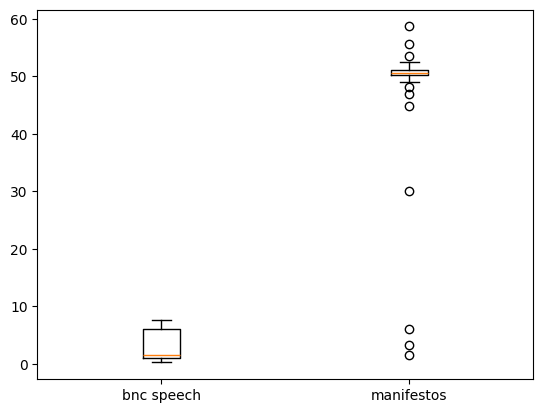

In [9]:
dataset_path = "dataset/test_data/"
manifestos = pandas.read_excel(dataset_path + "uk_manifestos.xlsx")
bnc_speech = pandas.read_excel(dataset_path + "bnc_speech.xlsx")


avg_manifesto_len = int(np.average([len(x) for x in manifestos['Text']]))

aux_arr = []
for code in bnc_speech["BNC inventory code"]:
     f = open(dataset_path + "PlainTextBNC/PlainTextBNC/" + code +".txt", "r")
     aux_arr.append(f.read()[:avg_manifesto_len])

bnc_speech["Text"] = aux_arr

bnc_speech['bs_score'] = bnc_speech["Text"].apply(get_bs_score)
manifestos['bs_score'] = manifestos["Text"].apply(get_bs_score)
print(bnc_speech, manifestos)

plt.boxplot([bnc_speech['bs_score'], manifestos['bs_score']], labels=['bnc speech', 'manifestos'])